In [ ]:
import pandas as pd
df=pd.read_csv('/content/Medical Cost Personal Dataset.csv')

In [ ]:
print(df.shape)

(1338, 7)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df=df.drop_duplicates()

<Axes: >

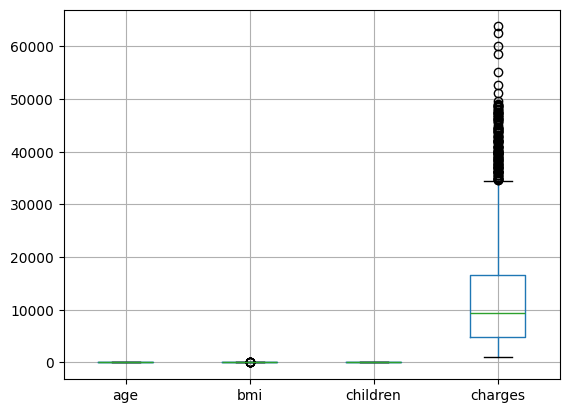

In [ ]:
df.boxplot()

In [ ]:
import numpy as np



In [ ]:
df['charges'] = np.log1p(df['charges'])  # التحويل اللوغاريتمي


In [ ]:
'''Q1=df[ 'charges'].quantile(0.25)
Q3=df[ 'charges'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df=df[(df[ 'charges']>=lower)&(df[ 'charges']<=upper)]'''

"Q1=df[ 'charges'].quantile(0.25)\nQ3=df[ 'charges'].quantile(0.75)\nIQR=Q3-Q1\nlower=Q1-1.5*IQR\nupper=Q3+1.5*IQR\ndf=df[(df[ 'charges']>=lower)&(df[ 'charges']<=upper)]"

In [ ]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


<Axes: >

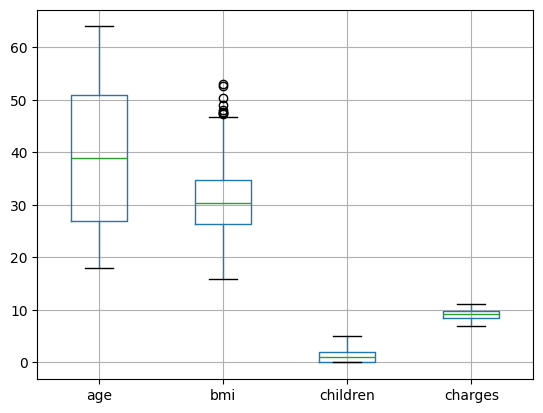

In [ ]:
df.boxplot()

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,9.734236
1,18,male,33.770,1,no,southeast,7.453882
2,28,male,33.000,3,no,southeast,8.400763
3,33,male,22.705,0,no,northwest,9.998137
4,32,male,28.880,0,no,northwest,8.260455


In [ ]:
df[ 'sex']=df[ 'sex'].replace({'female':1,'male':0})

<ipython-input-52-e854e4495014>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[ 'sex']=df[ 'sex'].replace({'female':1,'male':0})


In [ ]:
df['smoker']=df['smoker'].replace({'yes':1,'no':0})

<ipython-input-53-f9e509292002>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker']=df['smoker'].replace({'yes':1,'no':0})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 83.6+ KB


In [ ]:
df=pd.get_dummies(df,columns=['region']).replace({False:0,True:1})

<ipython-input-55-a2d4b319830e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=pd.get_dummies(df,columns=['region']).replace({False:0,True:1})


In [ ]:
'''from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
df['region']=encode.fit_transform(df['region'])'''

"from sklearn.preprocessing import LabelEncoder\nencode=LabelEncoder()\ndf['region']=encode.fit_transform(df['region'])"

In [ ]:
c=df.corr()
c

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.019814,0.109344,0.041536,-0.025587,0.526900,0.001868,0.001495,-0.012311,0.009415
sex,0.019814,1.000000,-0.046397,-0.017848,-0.076596,-0.007022,0.002008,0.012482,-0.017578,0.003767
bmi,0.109344,-0.046397,1.000000,0.012755,0.003746,0.132831,-0.138178,-0.136138,0.270057,-0.006211
children,0.041536,-0.017848,0.012755,1.000000,0.007331,0.160316,-0.023202,0.026044,-0.023492,0.021538
smoker,-0.025587,-0.076596,0.003746,0.007331,1.000000,0.665751,0.002597,-0.036321,0.068282,-0.037168
charges,0.526900,-0.007022,0.132831,0.160316,0.665751,1.000000,0.042388,-0.015431,0.014980,-0.042474
region_northeast,0.001868,0.002008,-0.138178,-0.023202,0.002597,0.042388,1.000000,-0.319842,-0.345909,-0.320493
region_northwest,0.001495,0.012482,-0.136138,0.026044,-0.036321,-0.015431,-0.319842,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,-0.017578,0.270057,-0.023492,0.068282,0.014980,-0.345909,-0.345909,1.000000,-0.346614
region_southwest,0.009415,0.003767,-0.006211,0.021538,-0.037168,-0.042474,-0.320493,-0.320493,-0.346614,1.000000


In [ ]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,9.734236,0,0,0,1
1,18,0,33.770,1,0,7.453882,0,0,1,0
2,28,0,33.000,3,0,8.400763,0,0,1,0
3,33,0,22.705,0,0,9.998137,0,1,0,0
4,32,0,28.880,0,0,8.260455,0,1,0,0


In [ ]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.019814,0.109344,0.041536,-0.025587,0.526900,0.001868,0.001495,-0.012311,0.009415
sex,0.019814,1.000000,-0.046397,-0.017848,-0.076596,-0.007022,0.002008,0.012482,-0.017578,0.003767
bmi,0.109344,-0.046397,1.000000,0.012755,0.003746,0.132831,-0.138178,-0.136138,0.270057,-0.006211
children,0.041536,-0.017848,0.012755,1.000000,0.007331,0.160316,-0.023202,0.026044,-0.023492,0.021538
smoker,-0.025587,-0.076596,0.003746,0.007331,1.000000,0.665751,0.002597,-0.036321,0.068282,-0.037168
charges,0.526900,-0.007022,0.132831,0.160316,0.665751,1.000000,0.042388,-0.015431,0.014980,-0.042474
region_northeast,0.001868,0.002008,-0.138178,-0.023202,0.002597,0.042388,1.000000,-0.319842,-0.345909,-0.320493
region_northwest,0.001495,0.012482,-0.136138,0.026044,-0.036321,-0.015431,-0.319842,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,-0.017578,0.270057,-0.023492,0.068282,0.014980,-0.345909,-0.345909,1.000000,-0.346614
region_southwest,0.009415,0.003767,-0.006211,0.021538,-0.037168,-0.042474,-0.320493,-0.320493,-0.346614,1.000000


In [ ]:
X=df.drop(columns='charges')
Y=df['charges']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df= scaler.fit_transform(df)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
df= scaler.fit_transform(df)

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [ ]:
models=[LinearRegression(),RandomForestRegressor(n_estimators=100,max_depth=10,random_state=42),DecisionTreeRegressor(max_depth=None)]

In [ ]:
def list_model (models):
  for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    print(model)
    print('mse  =',mse,'r2   =',r2)
    print('____________________')
list_model (models)


LinearRegression()
mse  = 0.15822472253428832 r2   = 0.829478626133356
____________________
RandomForestRegressor(max_depth=10, random_state=42)
mse  = 0.14036549580774582 r2   = 0.848725807160619
____________________
DecisionTreeRegressor()
mse  = 0.27385390396073805 r2   = 0.7048631642756757
____________________


In [ ]:
ploy=PolynomialFeatures(degree=2)

In [ ]:
x_tain_ploy=ploy.fit_transform(x_train)

In [ ]:
x_test_ploy=ploy.fit_transform(x_test)

In [ ]:
lin=LinearRegression()

In [ ]:
lin.fit(x_tain_ploy,y_train)

LinearRegression()

In [ ]:
y_pred=lin.predict(x_test_ploy)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('mse  =',mse,'r2   =',r2)

mse  = 0.10577682660753067 r2   = 0.8860025822294545
